In [1]:
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry #common function

import pandas as pd

import numpy as np

%matplotlib inline

import pickle

import visdom

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

from time import time,sleep
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity
# import visdom
# vis=visdom.Visdom()
# env="TagBased"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

import re
import sys
from pprint import pprint
#coding:utf-8

#solved chinese display in matplotlib
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' 
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt

list_industry=["水泥","食品飲料","石化","紡織","電機機械","電器電纜","化學工業",
               "建材居家用品","造紙","鋼鐵金屬","車輛相關","科技相關","營建地產","運輸","觀光休閒娛樂",
               "金融相關","百貨通路","公用事業","控股","生技醫療保健","農林漁牧","航天軍工","能源","傳播出版","綜合",
               "傳產其他","其他","金屬礦採選",
              ]
element="氫氦鋰鈹硼碳氮氧氟氖鈉鎂鋁矽磷硫氯氬鉀鈣鈧鈦釩鉻錳鐵鈷鎳銅鋅鎵鍺砷硒溴氪銣鍶銀鎘銦錫銻碲碘氙銫鋇鉑金汞鉈鉛鉍釙氡鍅鐳"

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [ ]:
df=pd.read_hdf("Model/history.h5")


In [ ]:
df[["loss","val_loss"]][:200].plot(subplots=True,layout=(1,3),figsize=(18,6))

In [ ]:
df[["triplet_loss","val_triplet_loss"]][:200].plot(subplots=True,layout=(1,3),figsize=(18,6))

In [ ]:
df[["anchor_loss","positive_loss","negative_loss"]][:50].plot(subplots=True,layout=(1,3),figsize=(18,6))

In [ ]:
df[["val_anchor_loss","val_positive_loss","val_negative_loss"]].plot(subplots=True,layout=(1,3),figsize=(18,6))

In [ ]:
df[["loss","val_loss"]][:30].plot(subplots=True,layout=(1,3),figsize=(18,6))

In [ ]:
df["triplet_loss"][342:343]

In [ ]:
l=800
triplet_loss=pd.read_csv("run_model1-tag-triplet_loss.csv")
triplet_loss=triplet_loss[:l]["Value"]
val_triplet_loss=pd.read_csv("run_model1-tag-val_triplet_loss.csv")
val_triplet_loss=val_triplet_loss[:l]["Value"]

loss=pd.read_csv("run_model1-tag-loss.csv")
loss=loss[:l]["Value"]
val_loss=pd.read_csv("run_model1-tag-val_loss.csv")
val_loss=val_loss[:l]["Value"]

negative_loss=pd.read_csv("run_model1-tag-negative_loss.csv")
negative_loss=negative_loss[:l]["Value"]
val_negative_loss=pd.read_csv("run_model1-tag-val_negative_loss.csv")
val_negative_loss=val_negative_loss[:l]["Value"]

df2=pd.DataFrame({"loss":loss,"val_loss":val_loss,
                  "negative_loss":negative_loss,"val_negative_loss":val_negative_loss,
                  "triplet_loss":triplet_loss,"val_triplet_loss":val_triplet_loss})

In [ ]:
_ = pd.DataFrame({20000:df["loss"][:l],19404:df2["loss"][:l]})
_.plot()

In [ ]:
column="negative_loss"
_ = pd.DataFrame({20000:df[column][:l],19404:df2[column][:l]})
_.plot()

In [ ]:
column="val_loss"
_ = pd.DataFrame({20000:df[column][:l],19404:df2[column][:l]})
_.plot()

In [ ]:
column="val_triplet_loss"
_ = pd.DataFrame({20000:df[column][:l],19404:df2[column][:l]})
_.plot()

## Plot Tsene every 50 epochs

#### load encoder model

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [267]:
def losspassfunction(y_true,y_pred):
    return y_pred
path="Models/Model3_on_all_industry/"
Tri_AutoEncoder=load_model(path+"bestmodel.hdf5",custom_objects={"losspassfunction":losspassfunction})
# Tri_AutoEncoder.load_weights(path+"regular/weights.2649.hdf5")
encoder=Tri_AutoEncoder.layers[3]

#### Preapre data

In [7]:
# Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v02.npy")

In [13]:
# with open("D:3.AutoencoderForArticle/train_dict_collect_industry_50000.p","rb") as f:
#     train_dict_collect_industry_50000=pickle.load(f)

In [ ]:
# with open("D:3.AutoencoderForArticle/test_dict_collect_industry_50000.p","rb") as f:
#     test_dict_collect_industry_50000=pickle.load(f)

In [35]:
# train_x_index=[]
# train_y=[]
# for k in train_dict_collect_industry_50000:
#     train_x_index+=list(train_dict_collect_industry_50000[k])
#     train_y+=[k]*len(train_dict_collect_industry_50000[k])
# len(train_x_index)
# len(train_y)
# train_x=Data[train_x_index]
# train_y=np.asarray(train_y)

# test_x_index=[]
# test_y=[]
# for k in test_dict_collect_industry_50000:
#     test_x_index+=list(test_dict_collect_industry_50000[k])
#     test_y+=[k]*len(test_dict_collect_industry_50000[k])
# len(test_x_index)
# len(test_y)
# test_x=Data[test_x_index]
# test_y=np.asarray(test_y)

In [36]:
# np.save("D:3.AutoencoderForArticle/train_x_v2_50000",train_x)
# np.save("D:3.AutoencoderForArticle/train_y_v2_50000",train_y)
# np.save("D:3.AutoencoderForArticle/test_x_v2_50000",test_x)
# np.save("D:3.AutoencoderForArticle/test_y_v2_50000",test_y)

### Load data

In [4]:
train_x=np.load("D:3.AutoencoderForArticle/train_x_v2_50000.npy")
train_y=np.load("D:3.AutoencoderForArticle/train_y_v2_50000.npy")
test_x=np.load("D:3.AutoencoderForArticle/test_x_v2_50000.npy")
test_y=np.load("D:3.AutoencoderForArticle/test_y_v2_50000.npy")

#### Embedding

In [114]:
# np.random.seed(0)
pick=np.random.permutation(len(train_x))[:1000]
train_x_pick=train_x[pick]
train_y_pick=train_y[pick]

In [215]:
np.random.seed(0)
pick=np.random.permutation(len(test_y))[:1000]
test_x_pick=test_x[pick]
test_y_pick=test_y[pick]
pick

array([ 6199,  4827,  6751,   605,  1346,  8175, 12401,  8594, 10969,
        7198,  4168,  1312,   343,  3020,  3645,  5452,  3861,  9725,
       10779,  6455, 11315, 10912,  4214,  8136,  5632,  8523,  2607,
         643,  7383,  6901,  6553,  7066,  2458,  2836, 10880,  8905,
        9991,  8387,  3992,  7639, 10136,  9732,  1656,  2643,  1292,
       10655,  1523,  9340,   491, 11995,  2137,  9793,  6671, 12489,
       10643,  5221, 10147,  6683,  7693, 10866, 11123,  6351,  2954,
        6539,  8725,  9929,   154,  1121, 11519,  8482,  6227,  7565,
        5205, 12085,  8788,  8097,  3398,  1501,  1217, 12111,  1872,
       10132,  2397,  5318,  1856, 11910,  2470,  2783, 11199,  1654,
       12309,   308,  6954, 11779,  9188,  6688,   393, 10236,  9494,
       10404, 10973,  3253,  1540,  1783,  1662,  7796,  8050,  9668,
       12428,  8244,  8202,  5475, 11236,   449,  6586,  6264,  9140,
        4608,  2839,  5653,   335,  6851,  2004,  6522,   950,  9041,
        1997,  7417,

In [277]:
emnedding_test_x=encoder.predict(test_x)
emnedding_test_x.shape

(12491, 100)

#### TSEN

In [315]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=emnedding_test_x
c=test_y
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,
            perplexity=50,
            n_iter=1000,
            metric=cosine,
            verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 12491 samples in 2.382s...
[t-SNE] Computed neighbors for 12491 samples in 2158.477s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12491
[t-SNE] Computed conditional probabilities for sample 2000 / 12491
[t-SNE] Computed conditional probabilities for sample 3000 / 12491
[t-SNE] Computed conditional probabilities for sample 4000 / 12491
[t-SNE] Computed conditional probabilities for sample 5000 / 12491
[t-SNE] Computed conditional probabilities for sample 6000 / 12491
[t-SNE] Computed conditional probabilities for sample 7000 / 12491
[t-SNE] Computed conditional probabilities for sample 8000 / 12491
[t-SNE] Computed conditional probabilities for sample 9000 / 12491
[t-SNE] Computed conditional probabilities for sample 10000 / 12491
[t-SNE] Computed conditional probabilities for sample 11000 / 12491
[t-SNE] Computed conditional probabilities for sample 12000 / 12491
[t-SNE] Computed conditional probabilities for

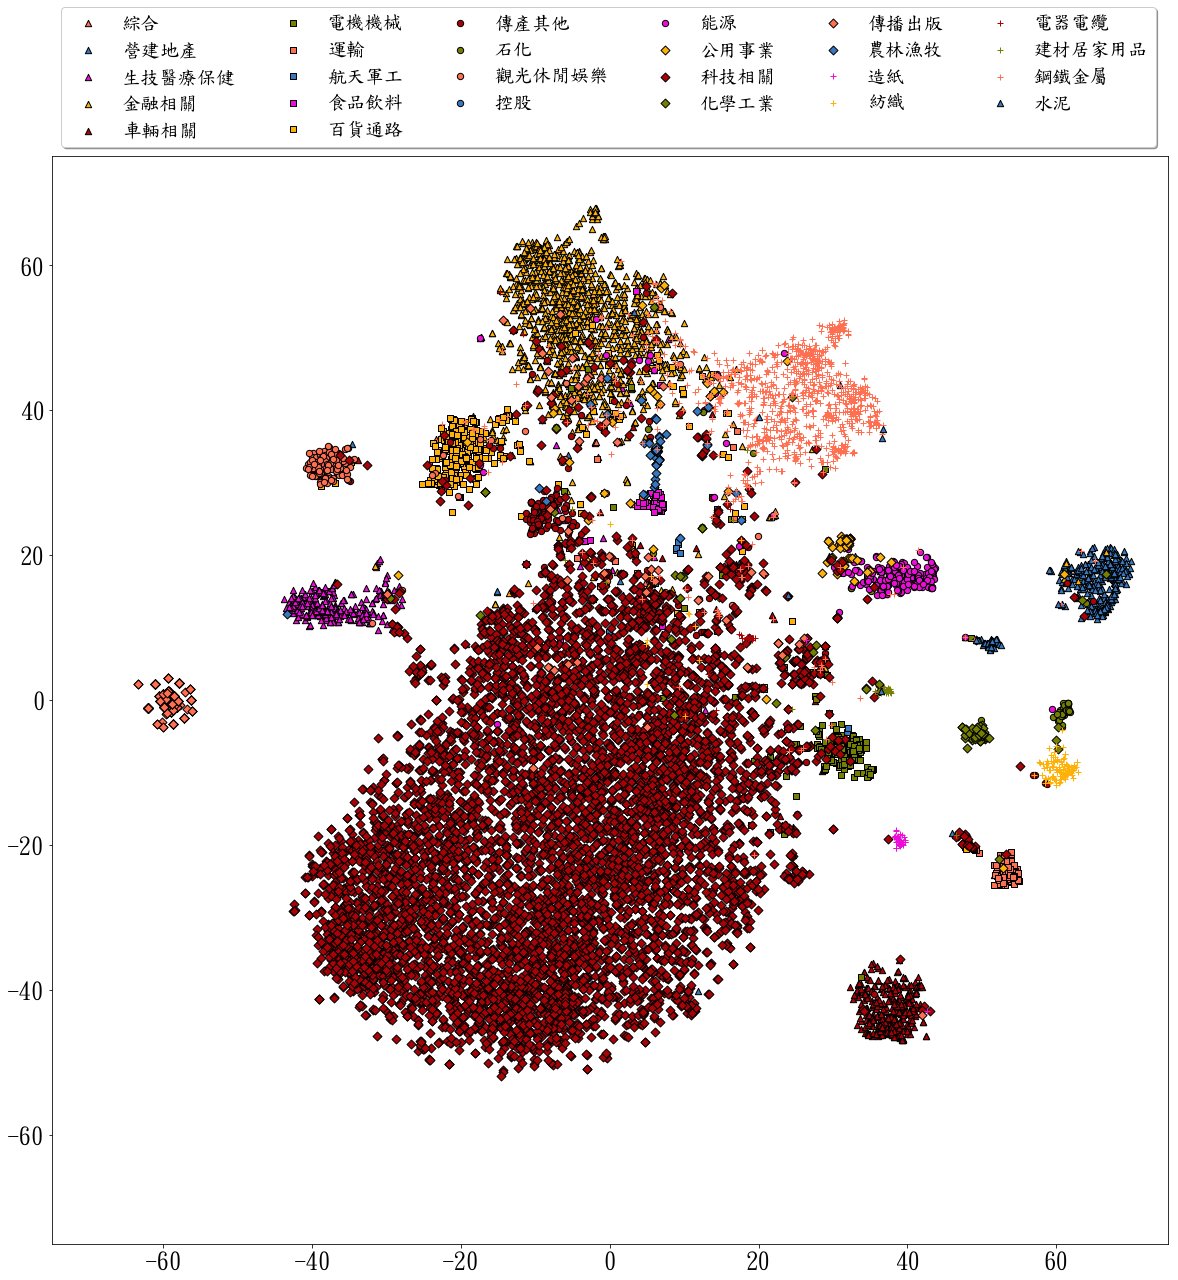

In [317]:
#plot
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000"]
marker=["^","s","o","D","+","x"]
import matplotlib
plt.figure(figsize=(20,20),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=40,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(marker))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-75,75))
plt.ylim((-75,75))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("tsnefig/cosine.test.png")

In [259]:
np.sum(test_y=="公用事業")

86

KeyboardInterrupt: 

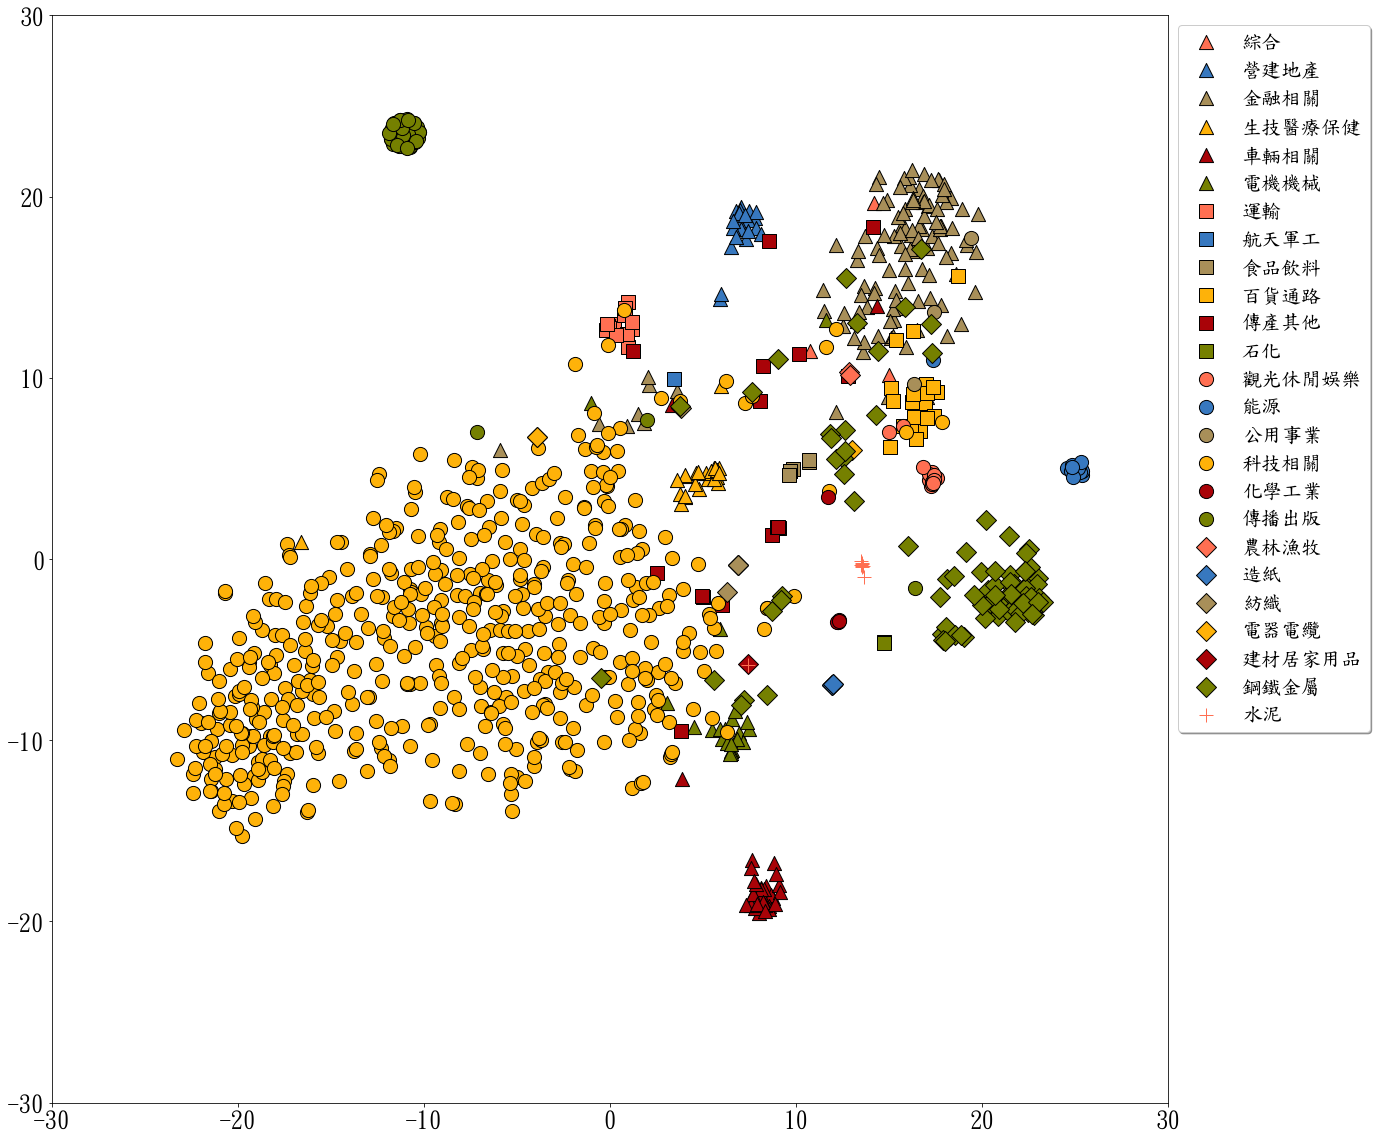

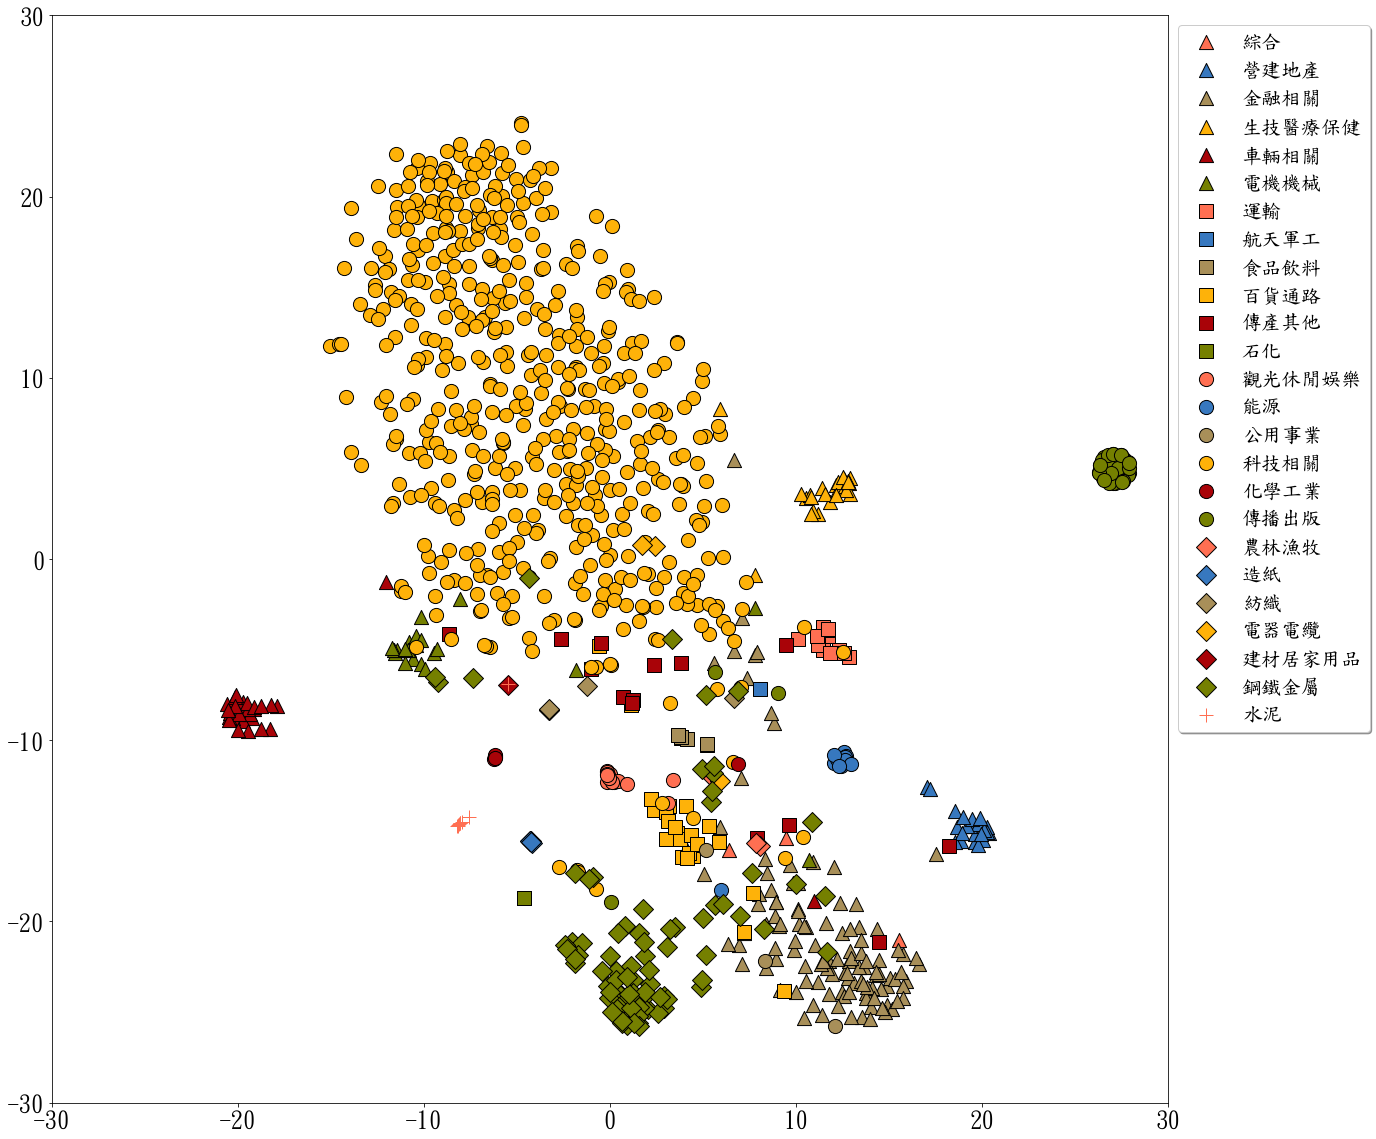

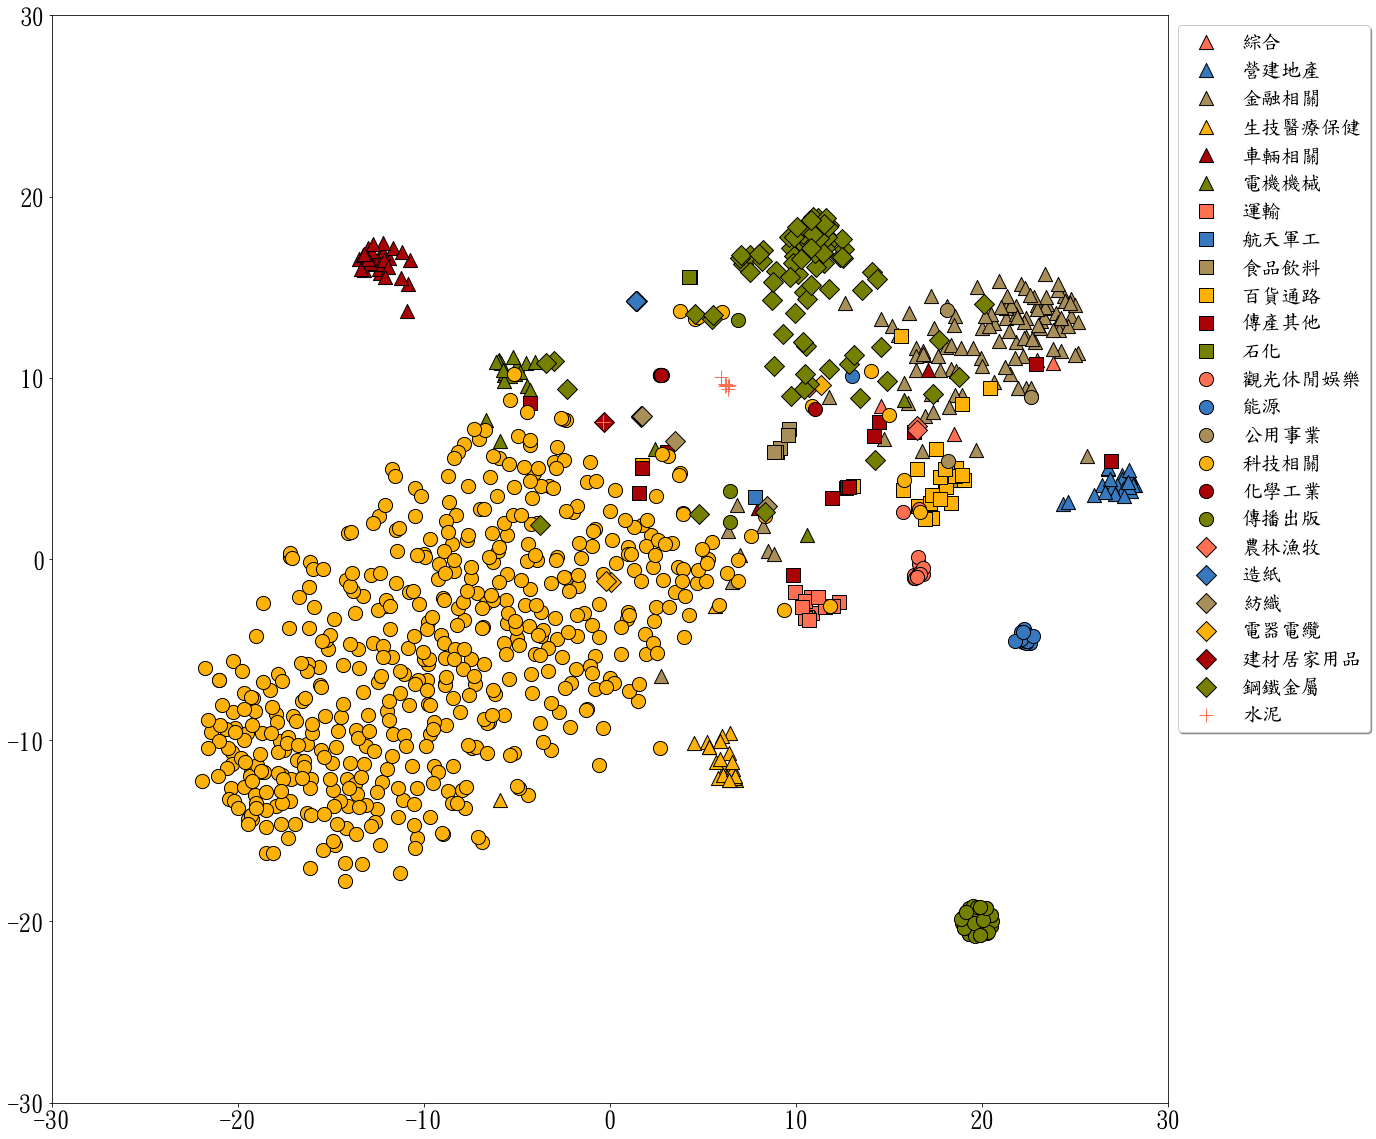

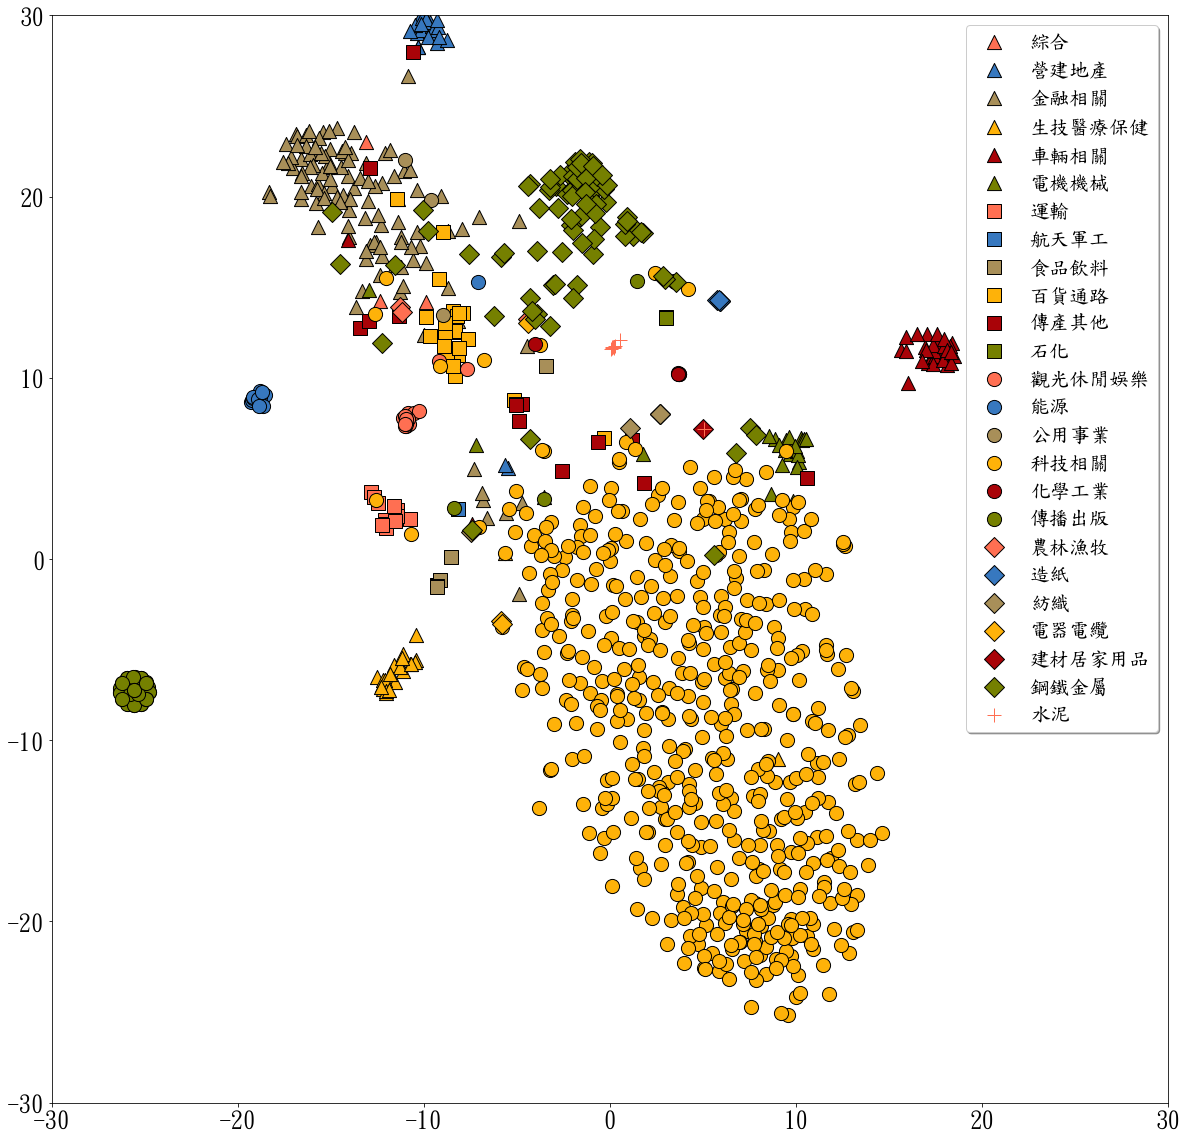

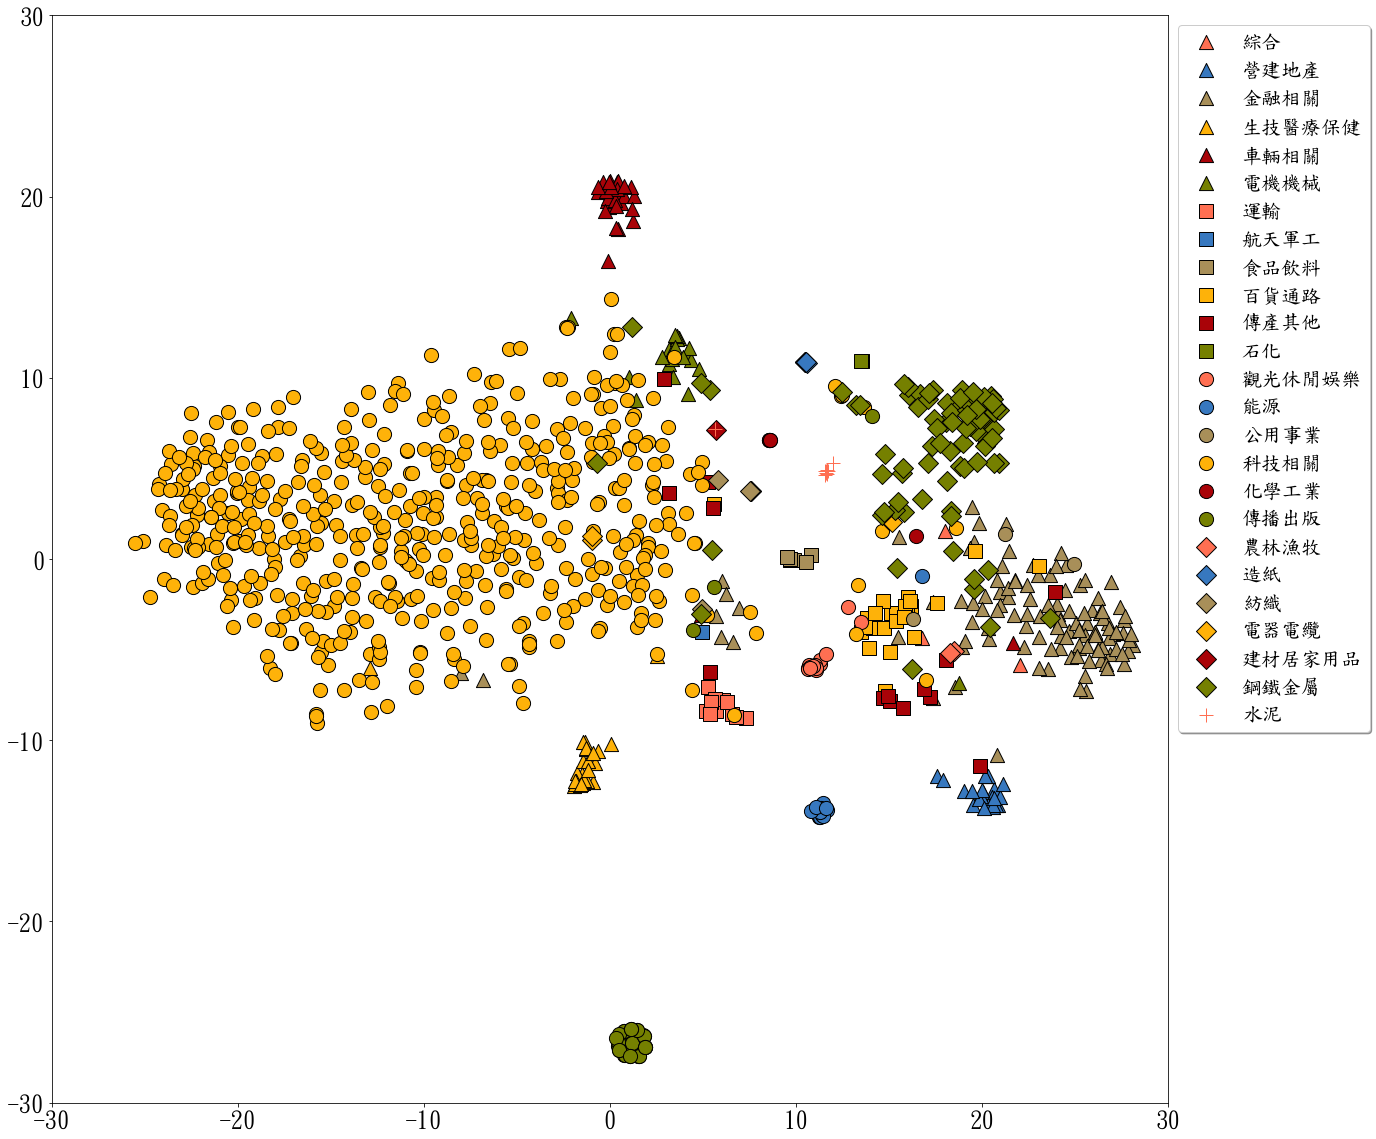

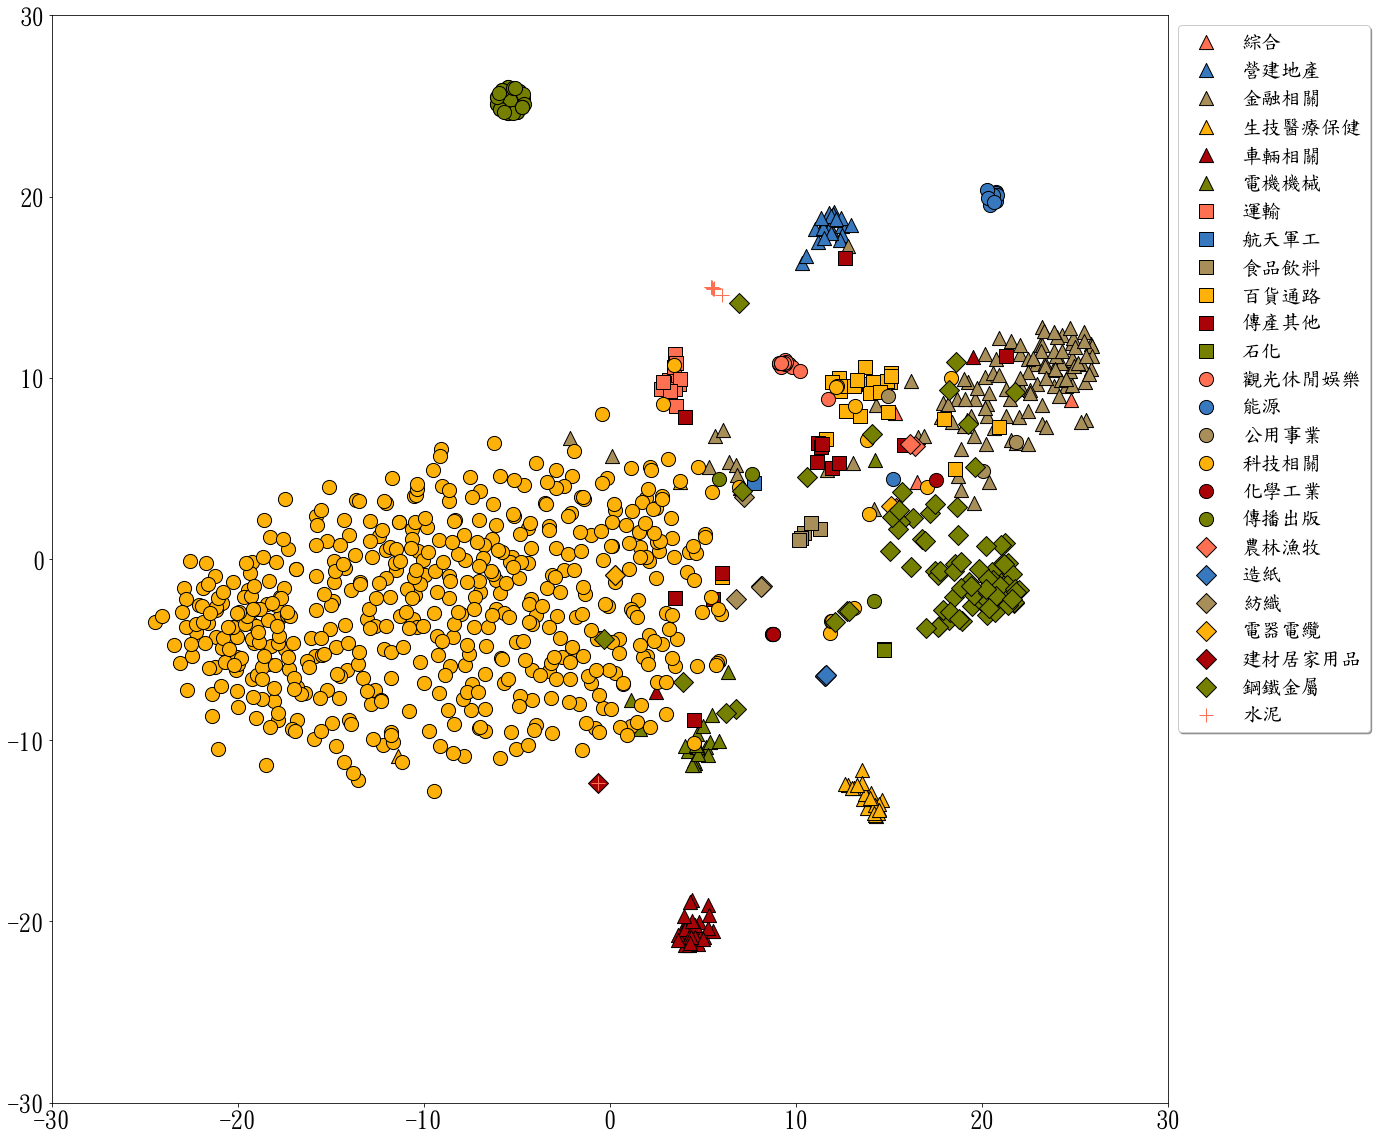

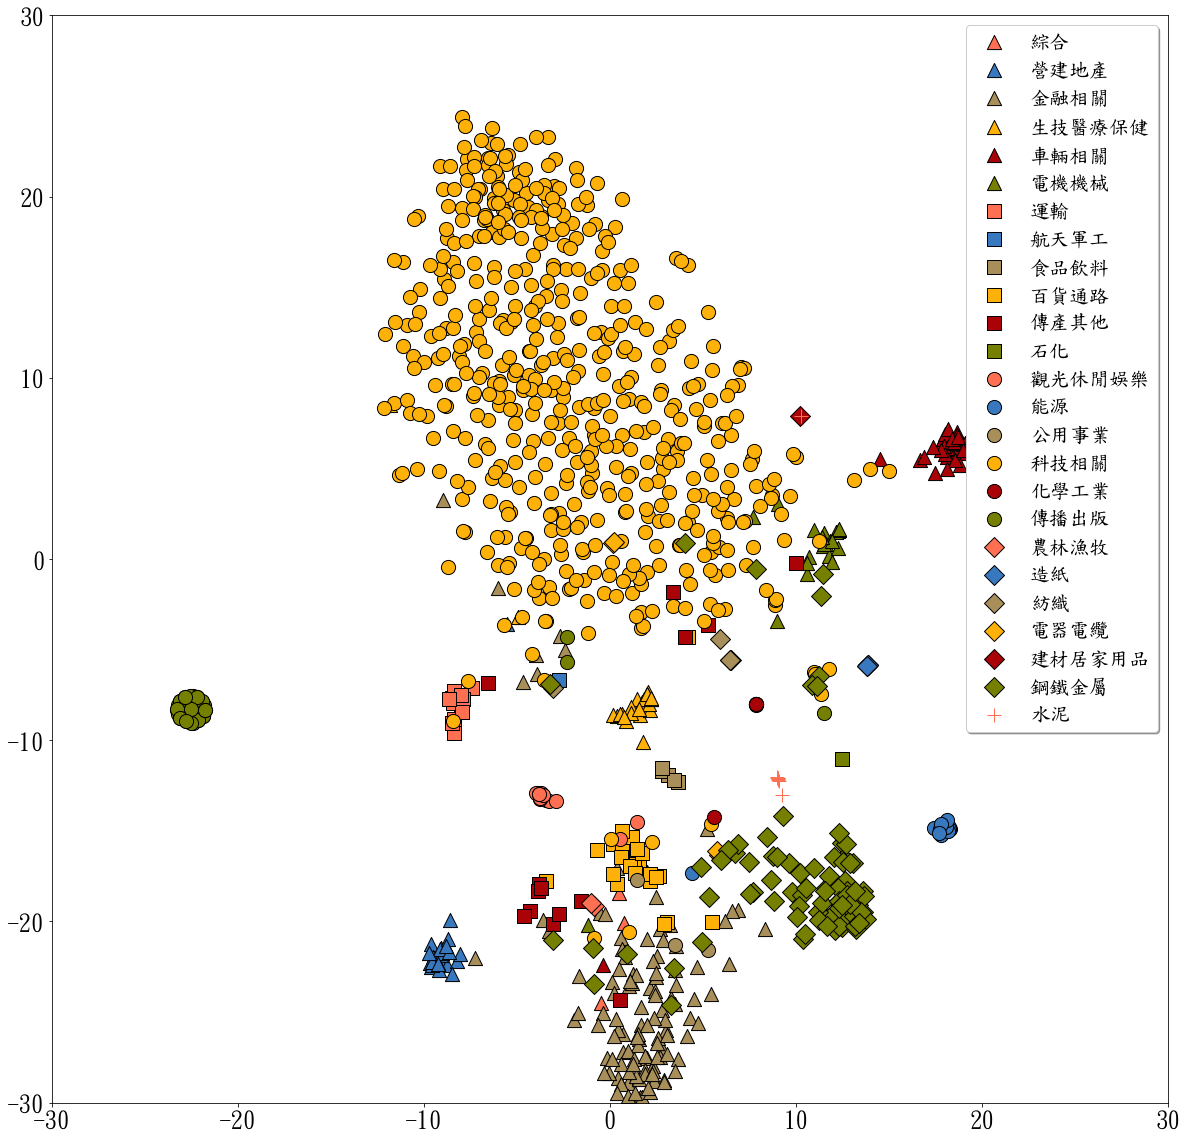

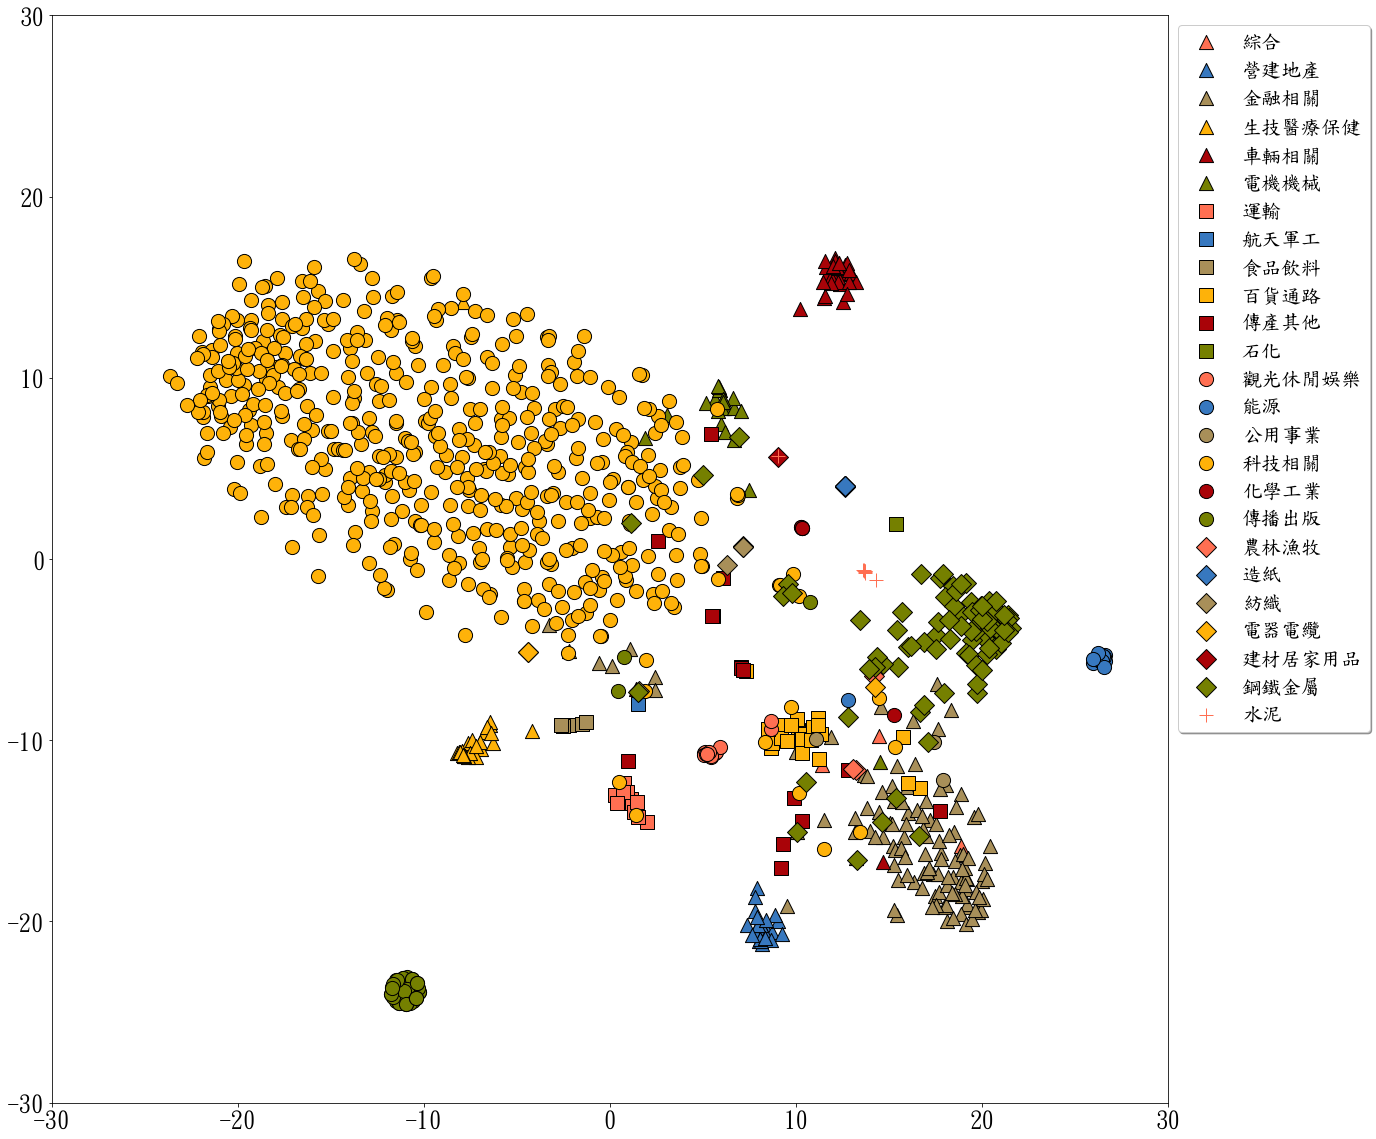

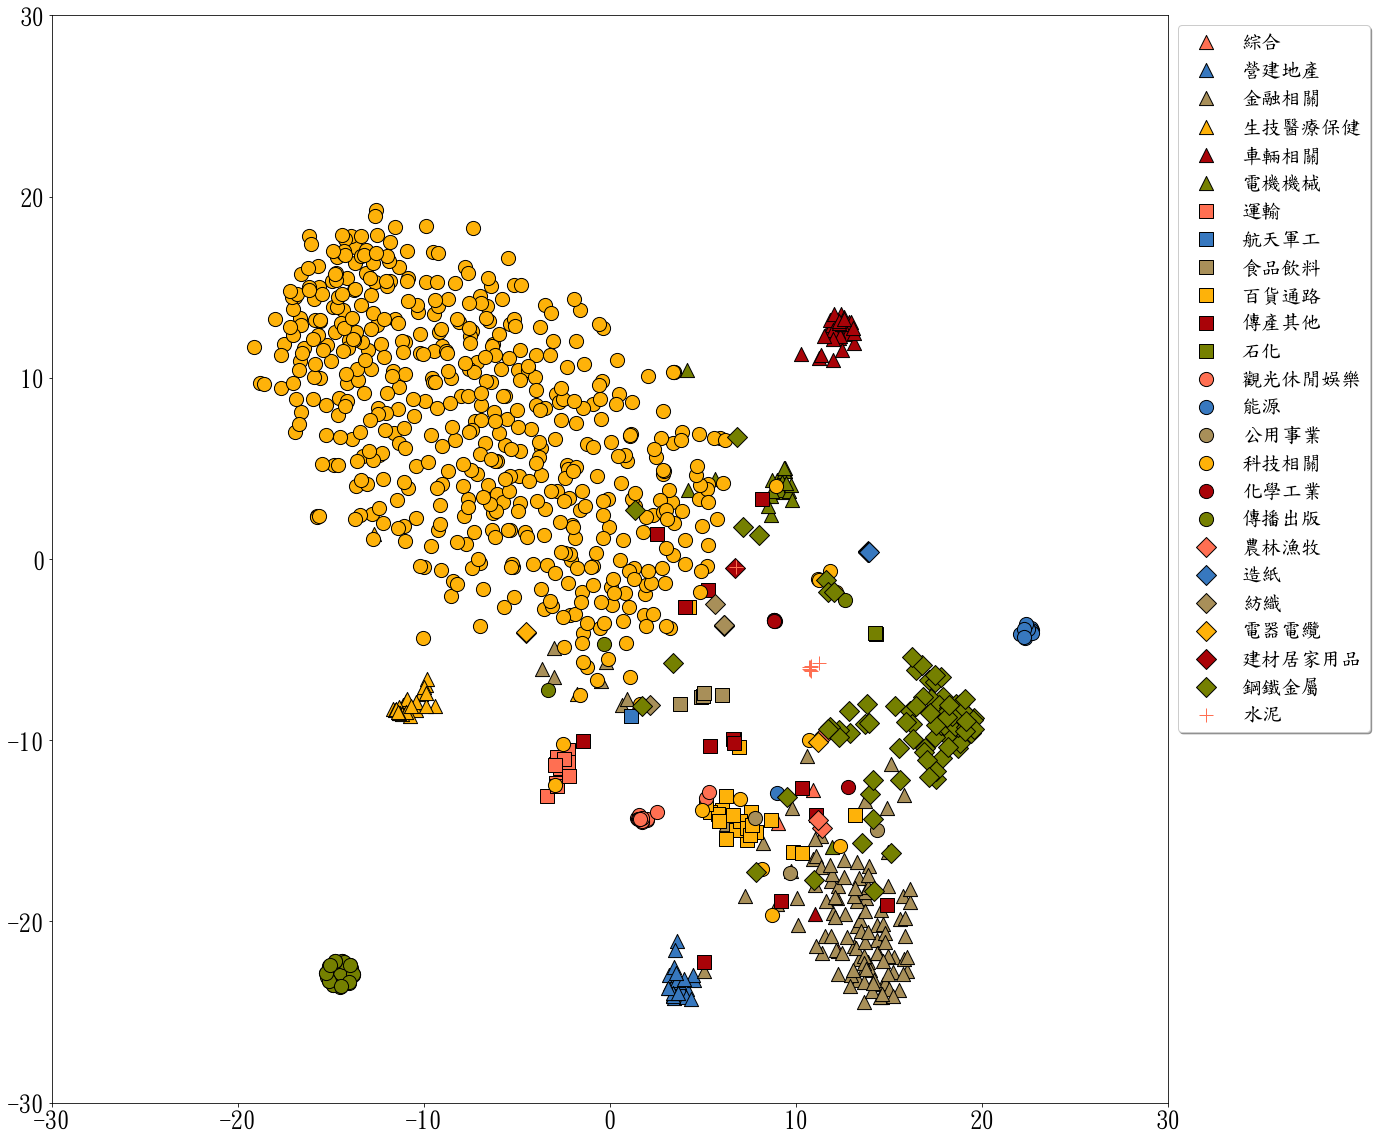

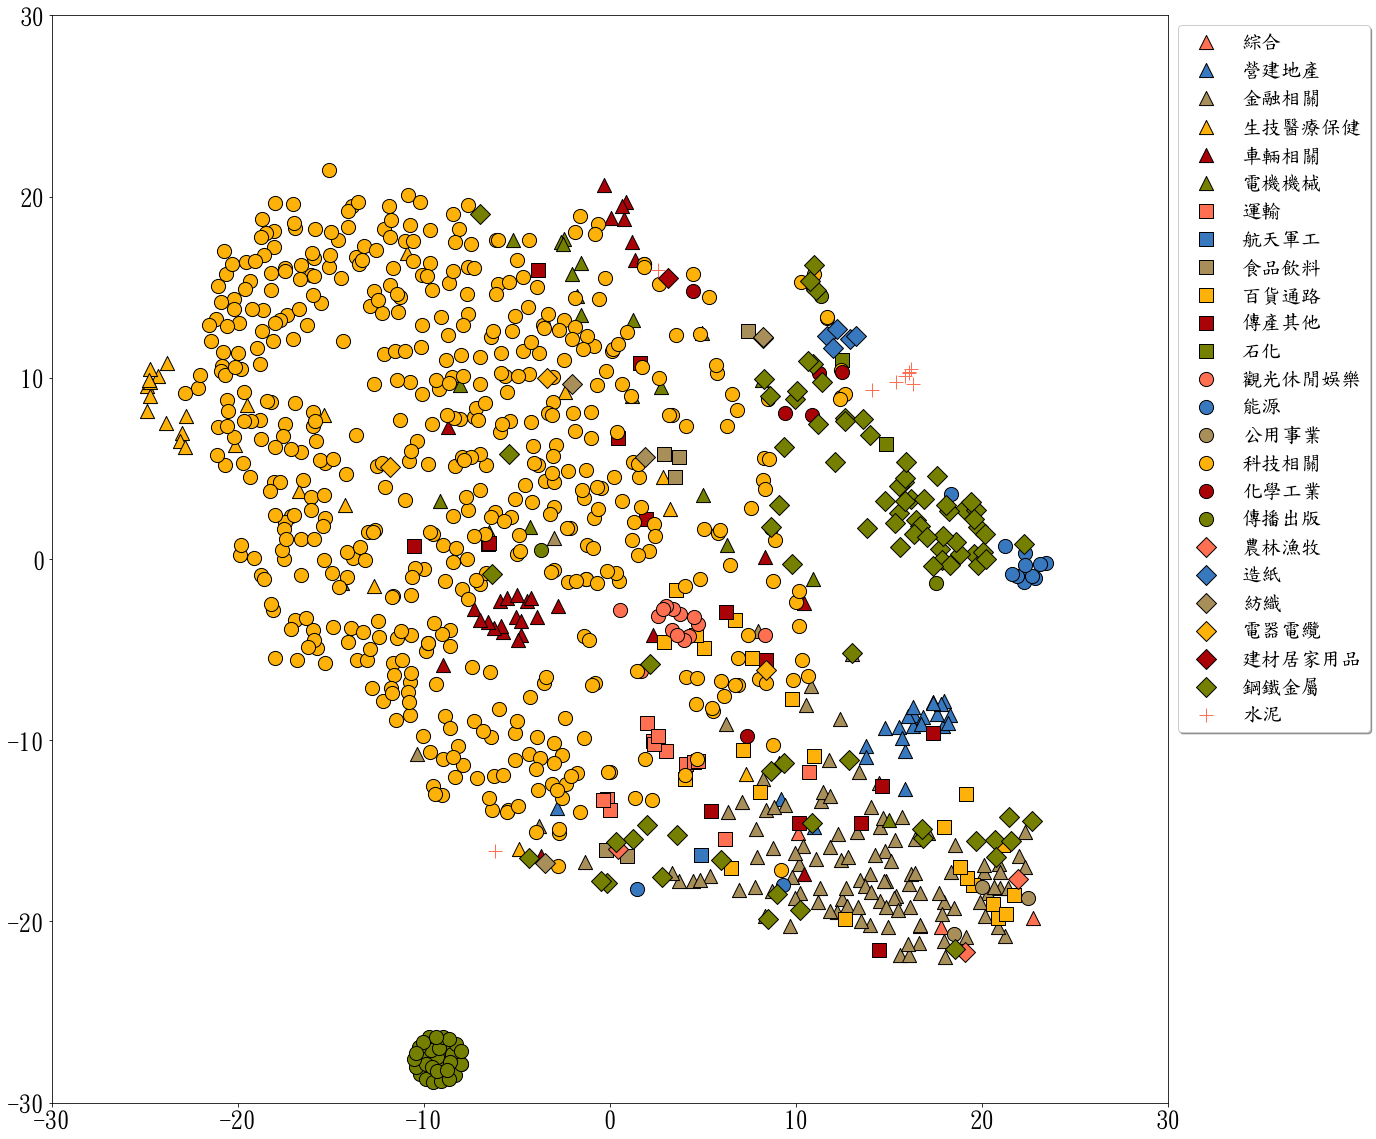

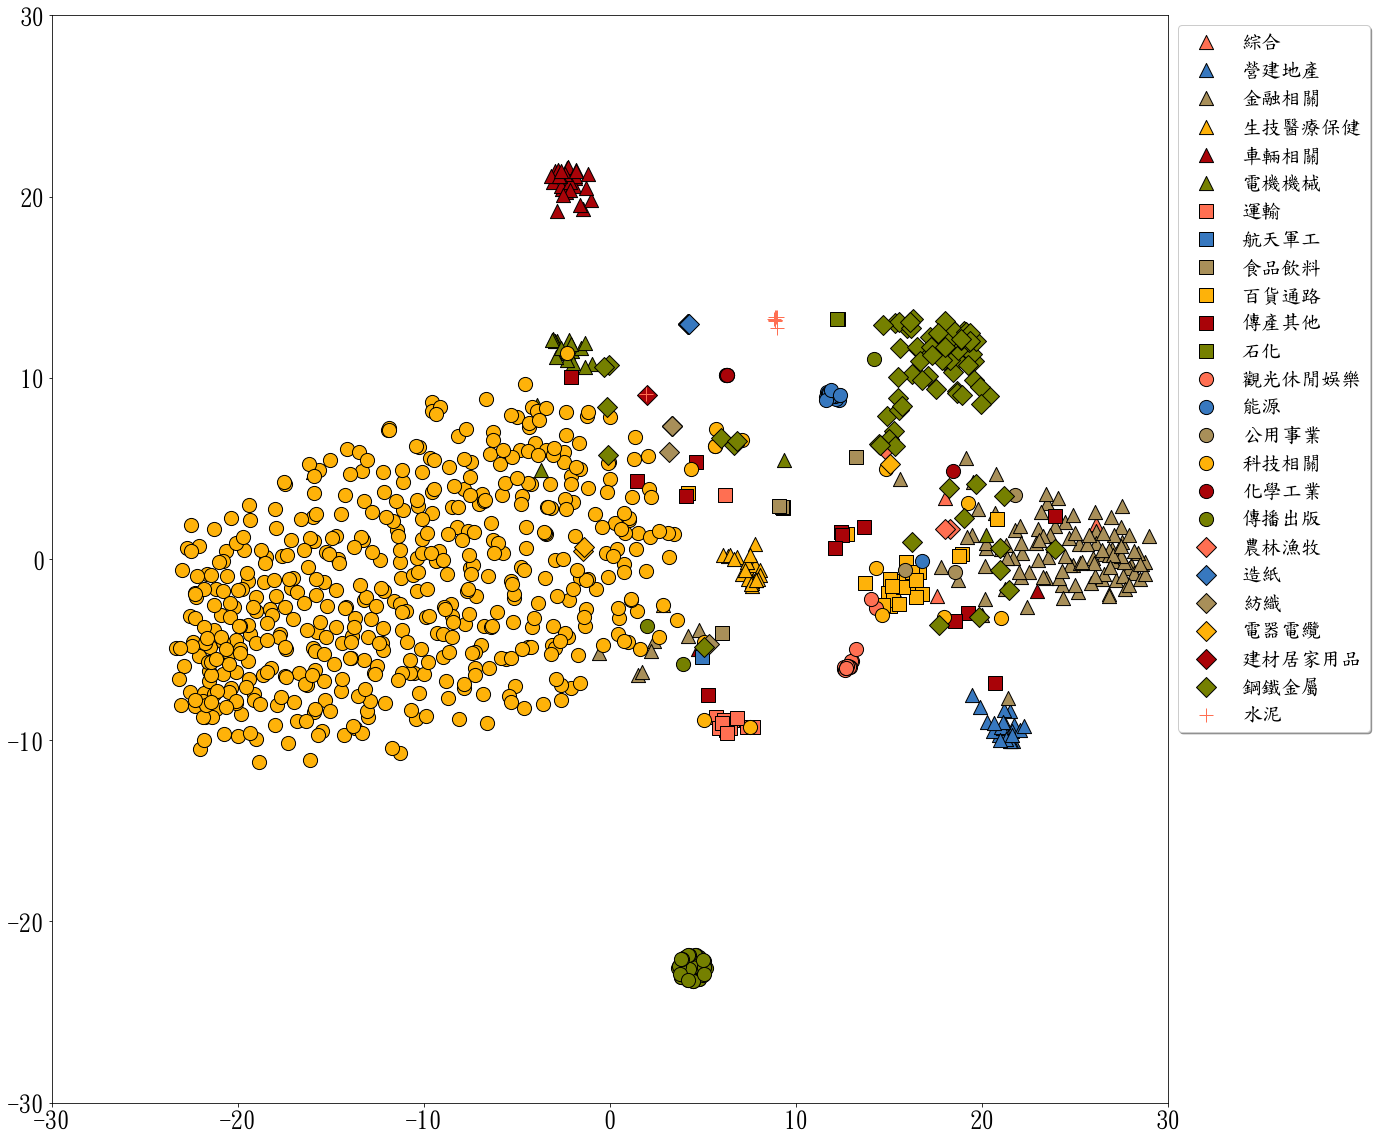

In [262]:
import os
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig
def losspassfunction(y_true,y_pred):
    return y_pred


path="Models/Model3_on_all_industry/"
metric=cosine
perplexity=50
n_iter=1500
X=test_x_pick
Y=test_y_pick
weightlist=os.listdir(path+"regular/")
Tri_AutoEncoder=load_model(path+"Tri_AutoEncoder.initial.h5",custom_objects={"losspassfunction":losspassfunction})
encoder=Tri_AutoEncoder.layers[3]

tsen_result=[]
for j,w in enumerate(tqdm_notebook(weightlist)):
    Tri_AutoEncoder.load_weights(path+"regular/{}".format(w))
    encoder=Tri_AutoEncoder.layers[3]
    emnedding_X=encoder.predict(X)
    
    tsne_data=emnedding_X
    c=Y
    
    tsne = TSNE(n_components=2, random_state=0,perplexity=perplexity,n_iter=n_iter,metric=metric,verbose=0)
    intermediates_tsne=tsne.fit_transform(tsne_data)
    tsen_result.append(intermediates_tsne)

    #plot
    color=["#ff6f52","#3778bf","#a88f59","#feb209","#a90308","#758000"]
    marker=["^","s","o","D","+",1]
    plt.figure(figsize=(20,20),)
    for i,k in enumerate(set(c)):
        c=np.asarray(c)
        pick=c==k
        plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                    linewidth=1,edgecolors="black",
                    c=color[i%len(color)],s=200,
                    marker=marker[(i//len(marker))%len(marker)],
                    label=k,)
    plt.legend(fontsize=20,
               bbox_to_anchor=(1,1),fancybox=True,shadow=True)
    plt.xlim((-30,30))
    plt.ylim((-30,30))
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    
    tsnpath =path+"tsnefigs/"
    if not os.path.isdir(tsnpath):
        os.mkdir(tsnpath)
    plt.savefig(tsnpath+"fig{}.png".format(j))
    